# Создаём свой когнитивный портрет

Привет! Сейчас мы погрузимся в мир **Science Art**, где наука -- а именно **искусственный интеллект** -- поможет нам создавать произведения искусства! А именно, мы познакомимся с техникой [когнитивного портрета](http://bit.do/peopleblending).

<img src="https://soshnikov.com/images/art/PhoBoGuy.png" width="30%"/>

В этой технике мы используем **нейросеть** для выделения ключевых точек лица на серии фотографий, с последующим поворотом и масштабированием фотографий таким образом, чтобы глаза и рот на всех снимках совпадали. Совмещая такие снимки, мы получаем интересный визуальный эффект. 



## Загружаем фотографии

Для экспериментов нам потребуется несколько изображений. Поместите изображения в директорию `images`. В демонстрационных целях я буду использовать набор фотографий, который скачаю в следующей ячейке. Если же в хотите нарисовать свой портрет - то загрузите туда свои изобажения

In [ ]:
!wget http://www.soshnikov.com/permanent/data/dsh-images.zip
!wget https://raw.githubusercontent.com/yandex-datasphere/jacademy/refs/heads/main/2025/jlib.py
!unzip dsh-images.zip

--2025-06-04 17:16:42--  http://www.soshnikov.com/permanent/data/dsh-images.zip
Resolving www.soshnikov.com (www.soshnikov.com)... 79.137.227.122
Connecting to www.soshnikov.com (www.soshnikov.com)|79.137.227.122|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3292713 (3,1M) [application/zip]
Saving to: 'dsh-images.zip'

     0K .......... .......... .......... .......... ..........  1%  663K 5s
    50K .......... .......... .......... .......... ..........  3%  837K 4s
   100K .......... .......... .......... .......... ..........  4%  814K 4s
   150K .......... .......... .......... .......... ..........  6% 1,07M 4s
   200K .......... .......... .......... .......... ..........  7% 1,78M 3s
   250K .......... .......... .......... .......... ..........  9% 4,87M 3s
   300K .......... .......... .......... .......... .......... 10%  918K 3s
   350K .......... .......... .......... .......... .......... 12%  808K 3s
   400K .......... .......... .......... ...

Archive:  dsh-images.zip
   creating: images/               
  inflating: images/1-30.jpg         
  inflating: images/20181226_142509916_iOS.jpg  
  inflating: images/dsh-photo.jpg    
  inflating: images/dsh_fall_sqr.JPG  
  inflating: images/Geek.JPG         
  inflating: images/IMG_2901.jpg     
  inflating: images/PassportPhoto.jpg  
  inflating: images/SoshDotNext.jpg  


Далее импортируем все необходимые библиотеки:

In [1]:
from jlib import *

Можем посмотреть, как выглядят наши фотографии:

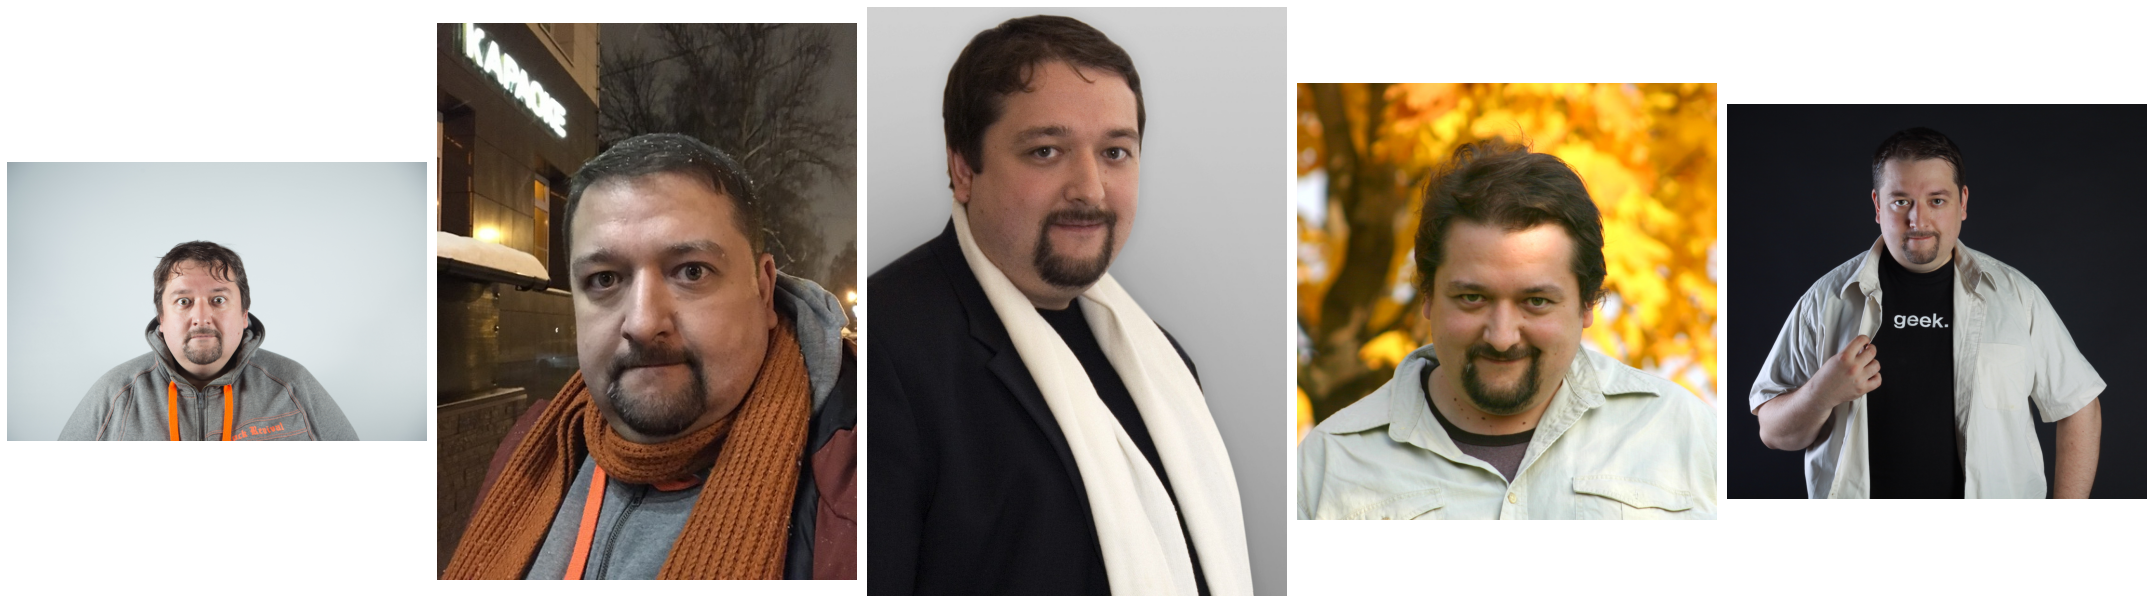

In [2]:
photos = [load_image(x) for x in sample_files("images/*.*")]
display_images(photos)

Также нам нужно будет скачать нейросеть для определения опорных точек лица:

In [2]:
!wget http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
!7za x shape_predictor_68_face_landmarks.dat.bz2

--2025-06-04 17:21:51--  http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
Resolving dlib.net (dlib.net)... 107.180.26.78
Connecting to dlib.net (dlib.net)|107.180.26.78|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2 [following]
--2025-06-04 17:21:51--  https://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
Connecting to dlib.net (dlib.net)|107.180.26.78|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64040097 (61M)
Saving to: 'shape_predictor_68_face_landmarks.dat.bz2'

     0K .......... .......... .......... .......... ..........  0%  148K 7m3s
    50K .......... .......... .......... .......... ..........  0%  296K 5m17s
   100K .......... .......... .......... .......... ..........  0% 19,3M 3m32s
   150K .......... .......... .......... .......... ..........  0%  299K 3m31s
   200K .......... .......... .......... ..........


7-Zip (A) 9.20  Copyright (c) 1999-2010 Igor Pavlov  2010-11-18

Processing archive: shape_predictor_68_face_landmarks.dat.bz2

Extracting  shape_predictor_68_face_landmarks.dat

Everything is Ok

Size:       99693937
Compressed: 64040097


## Обнаруживаем лица на фотографии

Для начала, научимся находить лица на фотографии:

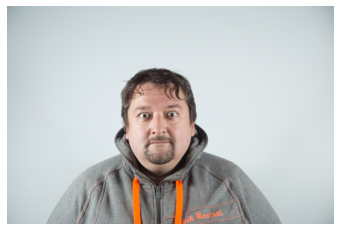

In [3]:
img = load_image(sample_file("images/*.*"))
display_images(img)

Находим лица:

Найдено 1 лиц


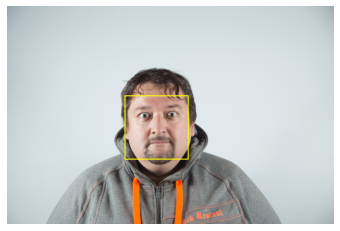

In [4]:
faces = detect_faces(img)
print(f"Найдено {len(faces)} лиц")
plot_face(img,faces)

### Извлекаем опорные точки лица

Далее мы выбираем какое-то лицо на фотографии и извлекаем для него **опорные точки**.

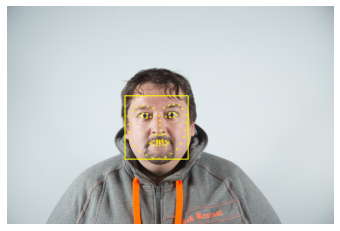

In [5]:
pts = detect_keypoints(img,faces[0])

plot_face(img,faces,pts)

### Обработка фотографий

Теперь мы пройдёмся по всем изображениям в нашей директории и извлечём из них опорные точки. Если на фотографии найдено несколько лиц - будем брать первое из них. Если лиц не найдено - будем эту фотографию игнорировать.

In [6]:
from glob import glob

images = []
imagepoints = []

for fn in glob("images/*"):
    print(f"Обрабатываю картинку {fn}..",end='')
    try:
      img = load_image(fn)
      faces = detect_faces(img)
      print(f' найдено {len(faces)} лиц')
      if len(faces)>0:
          images.append(img)
          imagepoints.append(detect_keypoints(img,faces[0]))
    except:
      print('ошибка')

Обрабатываю картинку images\1-30.jpg.. найдено 1 лиц
Обрабатываю картинку images\20181226_142509916_iOS.jpg.. найдено 1 лиц
Обрабатываю картинку images\dsh-photo.jpg.. найдено 1 лиц
Обрабатываю картинку images\dsh_fall_sqr.JPG.. найдено 1 лиц
Обрабатываю картинку images\Geek.JPG.. найдено 1 лиц
Обрабатываю картинку images\IMG_2901.jpg.. найдено 1 лиц
Обрабатываю картинку images\PassportPhoto.jpg.. найдено 1 лиц
Обрабатываю картинку images\SoshDotNext.jpg.. найдено 1 лиц


**Важно**: Если вдруг вы увидите сообщение **ОШИБКА**, это означает, фотография не смогла быть загружена, или возникла какая-то другая проблема. Такая фотография будет проигнорирована. Если несколько картинок оказались с ошибкой - не беда, главное, чтобы какое-то количество лиц было найдено!

Посмотрим на несколько загруженных нами изображений:

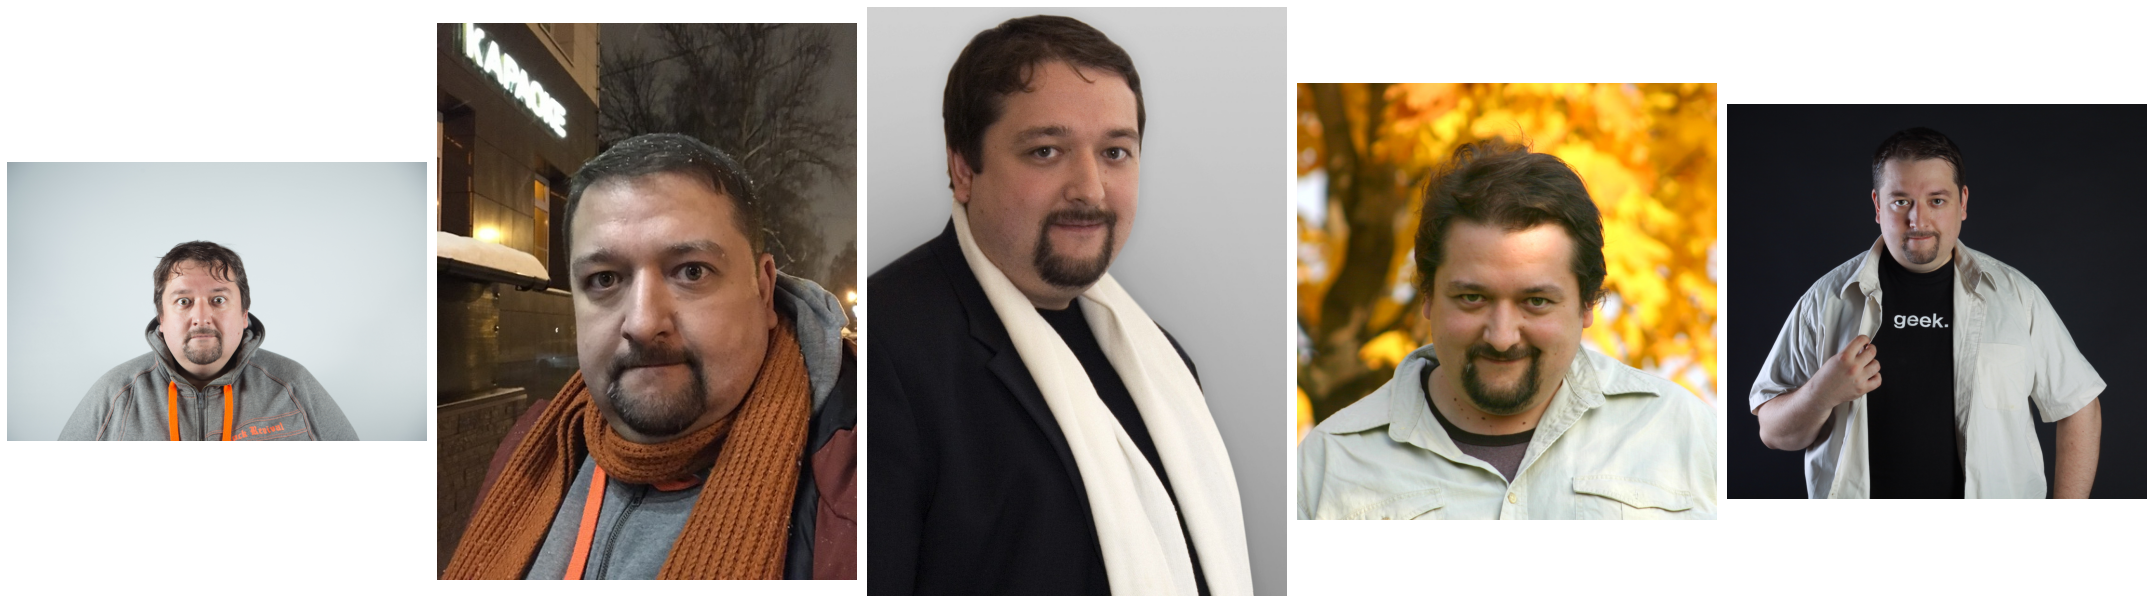

In [7]:
display_images(images[:5])

## Преобразования изображений

Чтобы выровнять все изображения по глазам, нам необходимо повернуть и масштабировать их. Для этого используем функцию `transform_image`, куда передаём координаты опорных точек, размер целевого изображения, и координаты глаз и середины рта на изображении.

Будем ориентироваться на размер финального изображения $300\times300$ точек, тогда для координат глаз выберем точки $(130,120)$ и $(170,120)$. 

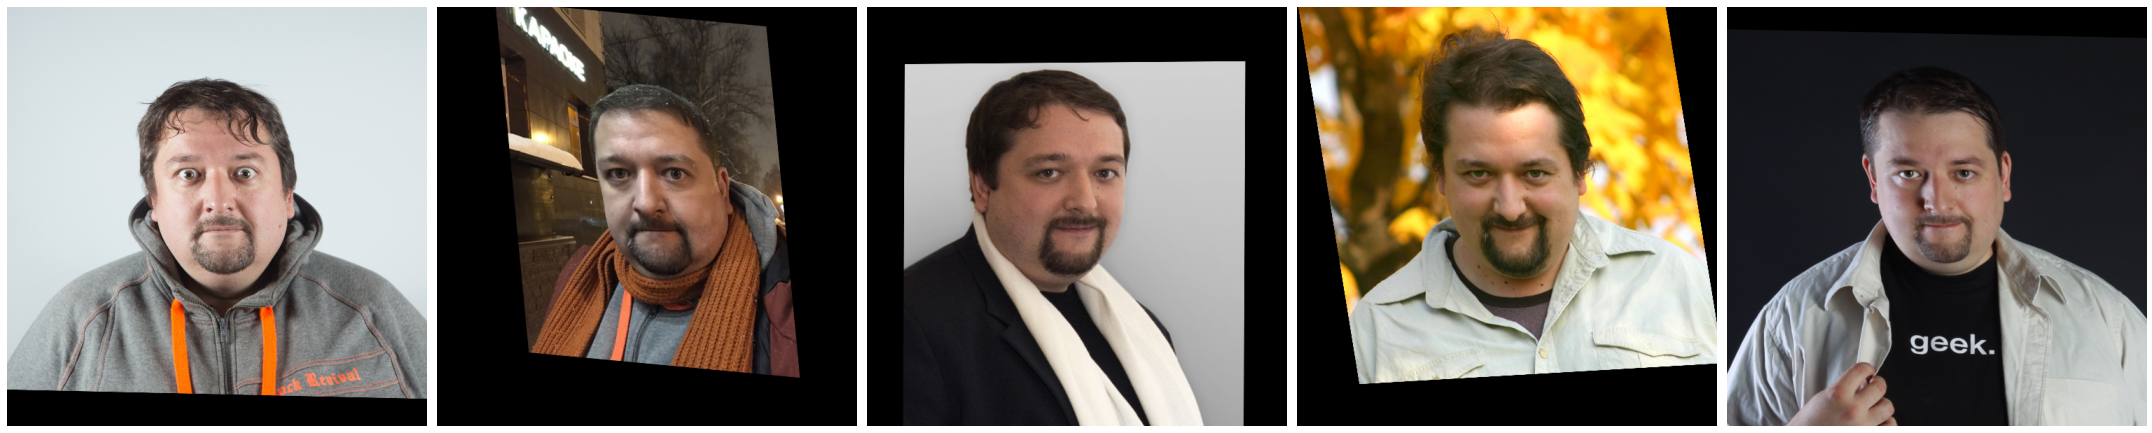

In [8]:
size = 600

target_triangle = [
    [130.0/300*size,120.0/300*size],
    [170.0/300*size,120.0/300*size],
    [150.0/300*size,160.0/300*size]]

img_aligned = [transform_image(i,a,size,target_triangle) for i,a in zip(images,imagepoints)]
display_images(img_aligned[:5])

## Смешивание изображений

Для получения результата нам осталось смешать все эти изображения:

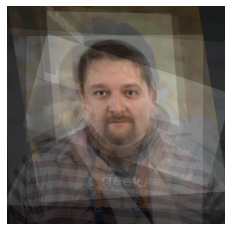

In [9]:
res = merge(img_aligned)
display_images(res)

Получившийся результат можно записать:

In [11]:
save_image(res,'result.jpg')

## Выводы

Python позволяет легко работать с изображениями и с нейросетями. Это позволяет нам решать сложные задачи несколькими строчками кода!